In [54]:
#import pandas, matplotlib, numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
#create arrays of lats and longs, declare arrays as variables
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
#use the zip function to create pairs from lats and lngs
lat_lngs = zip(lats, lngs)
lat_lngs

In [22]:
#add the lat/lng pairs to a list
coordinates = list(lat_lngs)

In [23]:
#import citipy module
from citipy import citipy

In [24]:
#Create a list to hold the cities
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, add the city name to the city list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

634

In [25]:
#Import the requests library.
import requests

#imort the API key
from config import weather_api_key

#import the datetime module from the datetime library
from datetime import datetime

In [26]:
#build basic URL for the OWM with weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59f8673959d4a2a526fee116d9f6ec34


In [27]:
#create an empty list to hold the weather data
city_data = []
#Print the beginning of the loggin
print('Beginning Data Retrieval   ')
print('---------------------------')

#create record count for cities 1-50
record_count = 1
#create set counter for sets of cities
set_count = 1

#loop through all the cities in the list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i>=50):
        set_count =+ 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + '&q=' + city.replace(' ', '+')
    
    #log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    #add 1 to the record count
    record_count +=1
    
#Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve data .
        city_weather = requests.get(city_url).json()
        #parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d  %H:%M:%S')
        #append the city information into the city_data list.
        city_data.append({'City': city.title(),
                         'Lat': city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
#if and error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
#indicate that Data Loading is complete.
print("-----------------------------")
print('Data Retrieval Complete      ')
print('-----------------------------')

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | caravelas
Processing Record 2 of Set 1 | flinders
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | beringovskiy
Processing Record 7 of Set 1 | innisfail
Processing Record 8 of Set 1 | pilos
City not found. Skipping...
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | severnoye
Processing Record 12 of Set 1 | spassk-dalniy
Processing Record 13 of Set 1 | samusu
City not found. Skipping...
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | san patricio
Processing Record 18 of Set 1 | maragogi
Processing Record 19 of Set 1 | wakkanai
Processing Record 20 of Set 1 | lata
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1

City not found. Skipping...
Processing Record 34 of Set 1 | acarau
Processing Record 35 of Set 1 | nemuro
Processing Record 36 of Set 1 | praia
Processing Record 37 of Set 1 | nylstroom
City not found. Skipping...
Processing Record 38 of Set 1 | lebu
Processing Record 39 of Set 1 | kenai
Processing Record 40 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 41 of Set 1 | dingolfing
Processing Record 42 of Set 1 | montorio al vomano
Processing Record 43 of Set 1 | esperance
Processing Record 44 of Set 1 | elbistan
Processing Record 45 of Set 1 | mogadishu
Processing Record 46 of Set 1 | guane
Processing Record 47 of Set 1 | praia da vitoria
Processing Record 48 of Set 1 | nador
Processing Record 49 of Set 1 | killarney
Processing Record 50 of Set 1 | touros
Processing Record 1 of Set 1 | pringsewu
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | eidfjord
Processing Record 4 of Set 1 | huilong
Processing Record 5 of Set 1 | paciran
Processing Record 6 

Processing Record 22 of Set 1 | shubarshi
Processing Record 23 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 24 of Set 1 | chulman
Processing Record 25 of Set 1 | komsomolskiy
Processing Record 26 of Set 1 | abhar
Processing Record 27 of Set 1 | guilin
Processing Record 28 of Set 1 | tupelo
Processing Record 29 of Set 1 | chegdomyn
Processing Record 30 of Set 1 | port elizabeth
Processing Record 31 of Set 1 | pisco
Processing Record 32 of Set 1 | erenhot
Processing Record 33 of Set 1 | nakasongola
Processing Record 34 of Set 1 | nelson bay
Processing Record 35 of Set 1 | katsuura
Processing Record 36 of Set 1 | yarensk
Processing Record 37 of Set 1 | hovd
Processing Record 38 of Set 1 | opuwo
Processing Record 39 of Set 1 | fier
Processing Record 40 of Set 1 | mount isa
Processing Record 41 of Set 1 | chadan
Processing Record 42 of Set 1 | musoma
Processing Record 43 of Set 1 | mollendo
Processing Record 44 of Set 1 | valera
Processing Record 45 of Set 1 | zalan

Processing Record 17 of Set 1 | tomatlan
Processing Record 18 of Set 1 | sistranda
Processing Record 19 of Set 1 | sonqar
City not found. Skipping...
Processing Record 20 of Set 1 | ardakan
Processing Record 21 of Set 1 | iisalmi
Processing Record 22 of Set 1 | flin flon
Processing Record 23 of Set 1 | gaoual
Processing Record 24 of Set 1 | lolua
City not found. Skipping...
Processing Record 25 of Set 1 | utiroa
City not found. Skipping...
Processing Record 26 of Set 1 | babanusah
City not found. Skipping...
Processing Record 27 of Set 1 | beira
Processing Record 28 of Set 1 | lampari
Processing Record 29 of Set 1 | kinango
Processing Record 30 of Set 1 | alice springs
Processing Record 31 of Set 1 | londoko
Processing Record 32 of Set 1 | oistins
Processing Record 33 of Set 1 | carbonia
Processing Record 34 of Set 1 | keti bandar
Processing Record 35 of Set 1 | udhampur
Processing Record 36 of Set 1 | pacific grove
Processing Record 37 of Set 1 | oeiras
Processing Record 38 of Set 1 |

In [47]:
#check the number of cities in the city_data array
len(city_data)

579

In [48]:
#convert the array of dictionaries to a DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Caravelas,-17.71,-39.25,69.96,66,3,14.85,BR,2020-08-25 21:39:47
1,Flinders,-34.58,150.86,48.99,85,0,1.99,AU,2020-08-25 21:39:47
2,Port Alfred,-33.59,26.89,60.98,73,0,18.61,ZA,2020-08-25 21:39:47
3,Kapaa,22.08,-159.32,86.00,66,40,11.41,US,2020-08-25 21:38:09
4,Albany,42.60,-73.97,78.01,73,40,12.75,US,2020-08-25 21:39:47
5,Beringovskiy,63.05,179.32,51.03,75,92,14.18,RU,2020-08-25 21:39:48
6,Innisfail,-17.53,146.03,59.00,91,56,5.99,AU,2020-08-25 21:39:48
7,Jamestown,42.10,-79.24,77.00,57,75,11.41,US,2020-08-25 21:39:48
8,Mataura,-46.19,168.86,39.31,84,75,5.37,NZ,2020-08-25 21:39:48
9,Severnoye,56.35,78.36,47.30,96,6,5.35,RU,2020-08-25 21:39:48


In [49]:
#reorder the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Caravelas,BR,2020-08-25 21:39:47,-17.71,-39.25,69.96,66,3,14.85
1,Flinders,AU,2020-08-25 21:39:47,-34.58,150.86,48.99,85,0,1.99
2,Port Alfred,ZA,2020-08-25 21:39:47,-33.59,26.89,60.98,73,0,18.61
3,Kapaa,US,2020-08-25 21:38:09,22.08,-159.32,86.00,66,40,11.41
4,Albany,US,2020-08-25 21:39:47,42.60,-73.97,78.01,73,40,12.75
5,Beringovskiy,RU,2020-08-25 21:39:48,63.05,179.32,51.03,75,92,14.18
6,Innisfail,AU,2020-08-25 21:39:48,-17.53,146.03,59.00,91,56,5.99
7,Jamestown,US,2020-08-25 21:39:48,42.10,-79.24,77.00,57,75,11.41
8,Mataura,NZ,2020-08-25 21:39:48,-46.19,168.86,39.31,84,75,5.37
9,Severnoye,RU,2020-08-25 21:39:48,56.35,78.36,47.30,96,6,5.35


In [50]:
#create the output file (CSV)
output_data_file = 'weather_data/cities.csv'
#export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [51]:
#extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [52]:
#import time module
import time

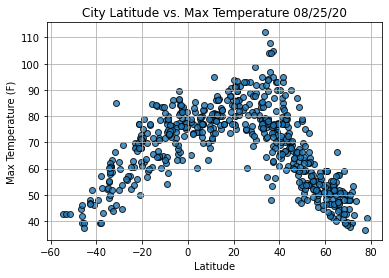

In [55]:
#build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = 0.8, label = "Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig1.png')
          
#Show plot
plt.show()

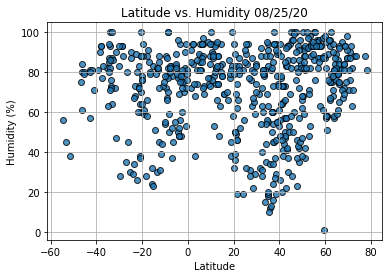

In [56]:
#build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = 0.8, label = "Cities")

#incorporate the other graph properties
plt.title(f"Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig2.png')
          
#Show plot
plt.show()

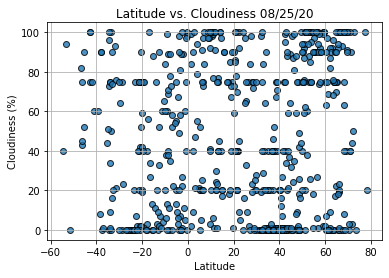

In [57]:
#build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = 0.8, label = "Cities")

#incorporate the other graph properties
plt.title(f"Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig3.png')
          
#Show plot
plt.show()

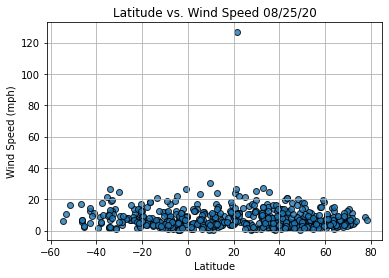

In [58]:
#build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = 0.8, label = "Cities")

#incorporate the other graph properties
plt.title(f"Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig4.png')
          
#Show plot
plt.show()